   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

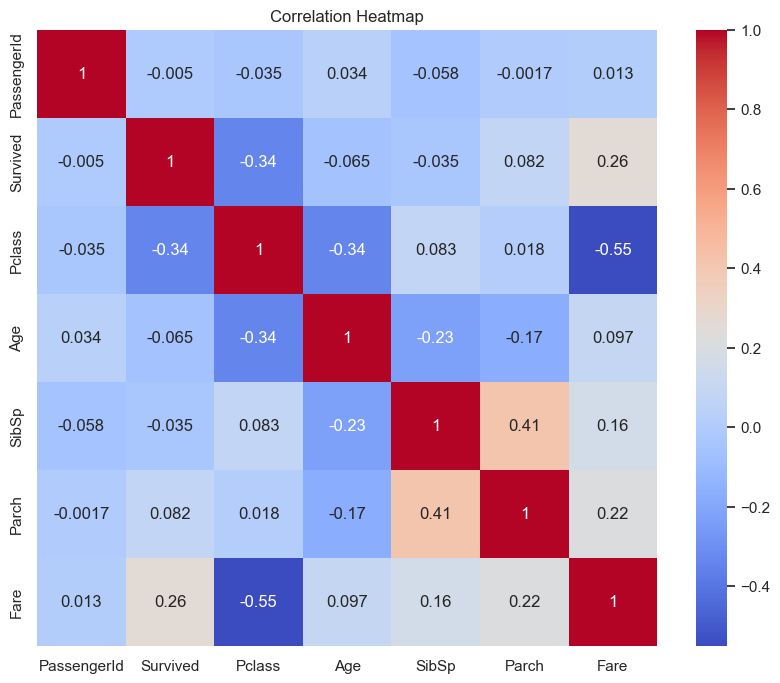

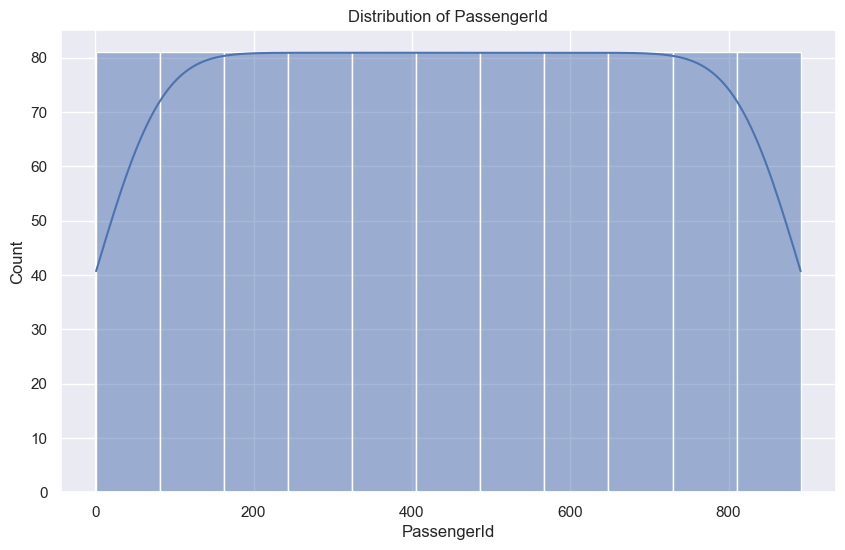

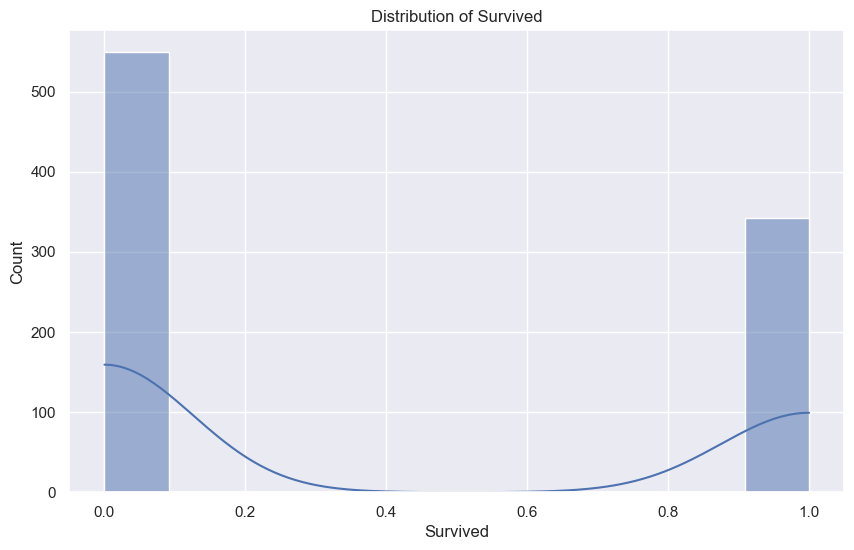

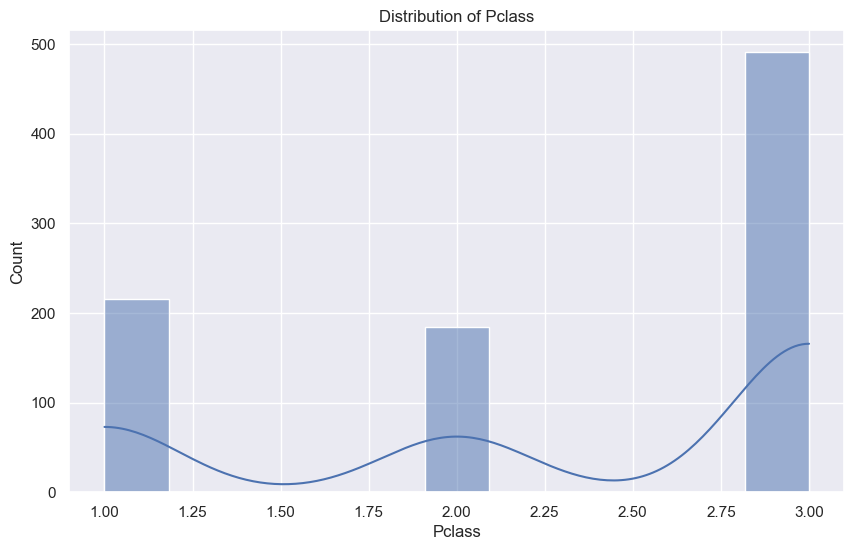

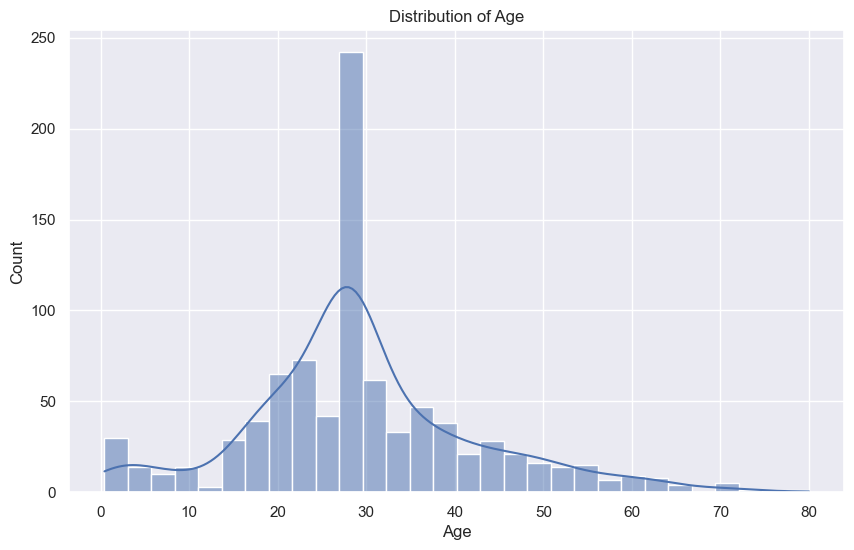

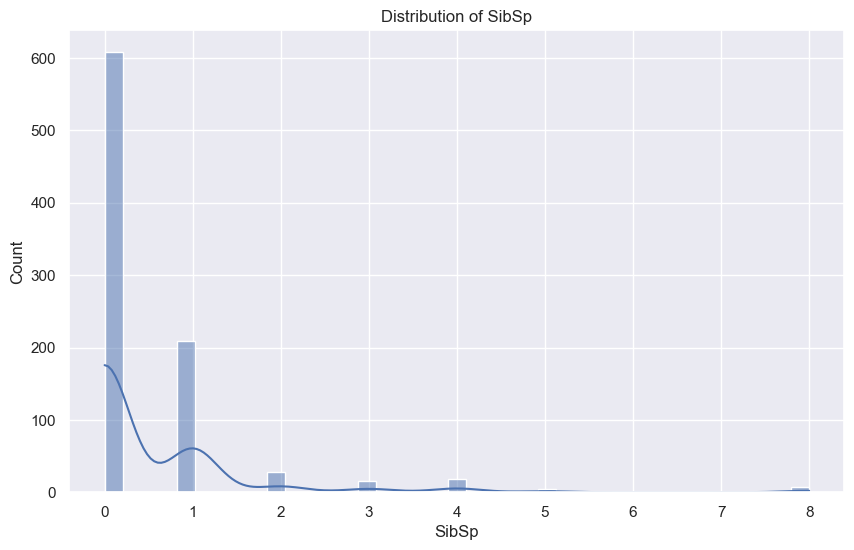

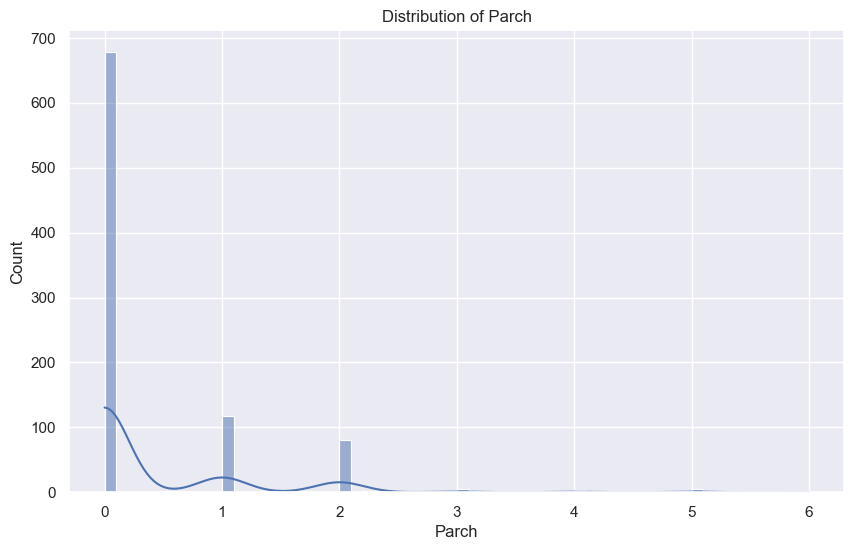

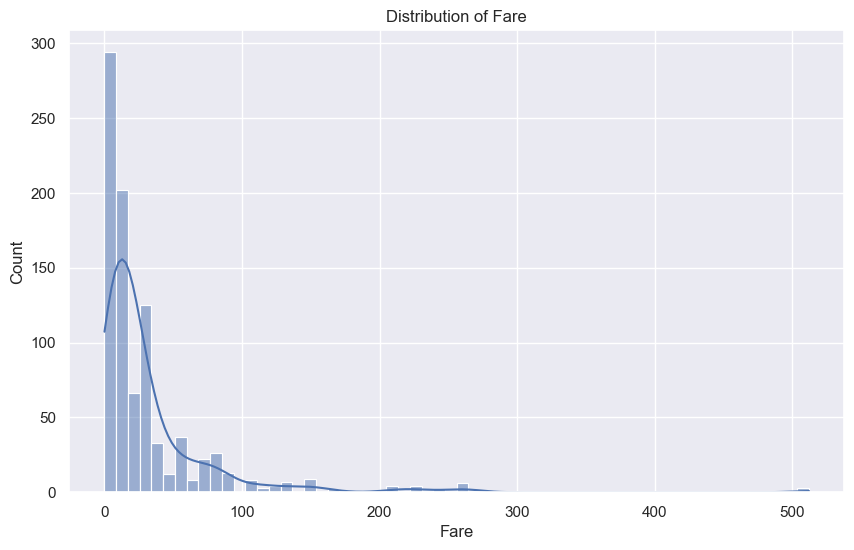

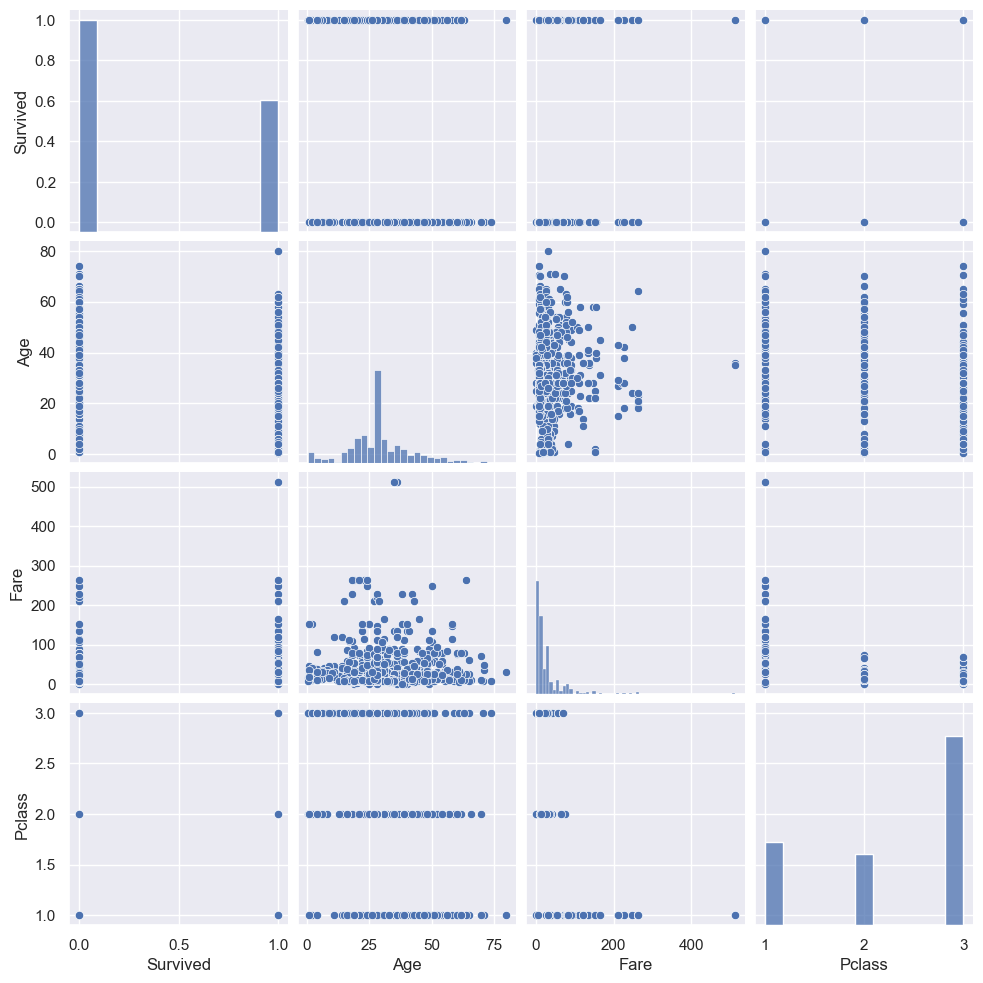

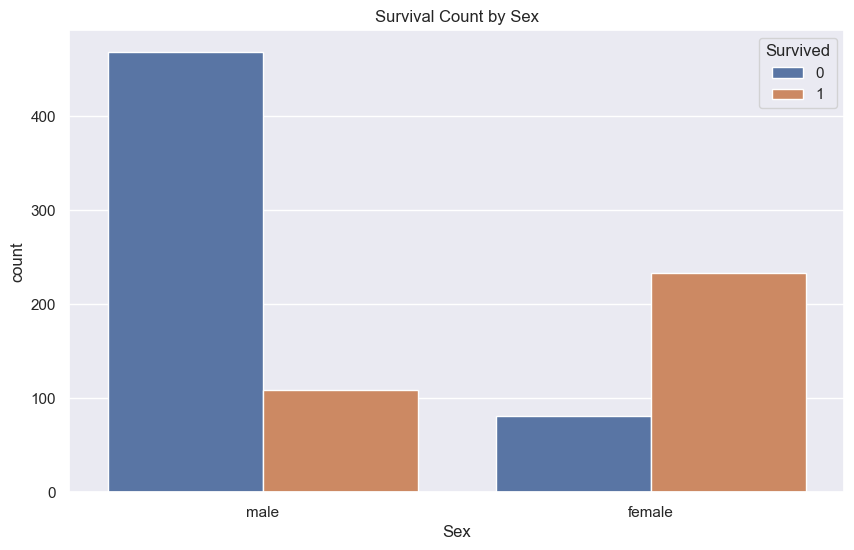

✅ EDA complete!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,6)

df = pd.read_csv(r"C:\Users\welcome\Documents\task 2\train.csv")

print(df.head())
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

correlation = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

selected_cols = [col for col in ['Survived', 'Age', 'Fare', 'Pclass'] if col in df.columns]
if len(selected_cols) >= 2:
    sns.pairplot(df[selected_cols])
    plt.show()

if 'Sex' in df.columns and 'Survived' in df.columns:
    plt.figure()
    sns.countplot(x='Sex', hue='Survived', data=df)
    plt.title('Survival Count by Sex')
    plt.show()

print("✅ EDA complete!")